<a href="https://colab.research.google.com/github/bookRa/TF_Tuts/blob/master/Tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.tensorflow.org/tutorials/keras/classification

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

In [59]:
print(tf.__version__)

1.15.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion = keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

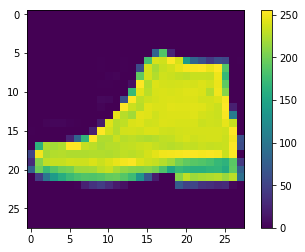

In [37]:
plt.figure()
# for x in [1, 5, 15]:
plt.imshow(train_imgs[42])
plt.colorbar()
# plt.grid()
plt.show()

In [0]:
train_imgs = train_imgs / 255.0

test_imgs = test_imgs / 255.0


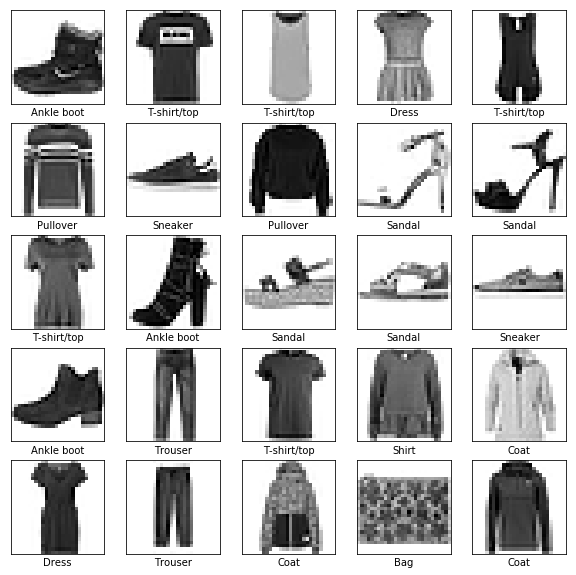

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [62]:
model.fit(train_imgs, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4965 - acc: 0.8265
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3729 - acc: 0.8657
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3358 - acc: 0.8782
Epoch 4/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3131 - acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2945 - acc: 0.8916
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2824 - acc: 0.8949
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2700 - acc: 0.8993
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2582 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2486 - acc: 0.9075
Epoch 10/10
60000/60000 [==============================] - 

In [63]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

print(f"{test_loss}, {test_acc}")

10000/10000 - 0s - loss: 0.3671 - acc: 0.8768
0.3670710795044899, 0.876800000667572


In [0]:
predictions = model.predict(test_imgs)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

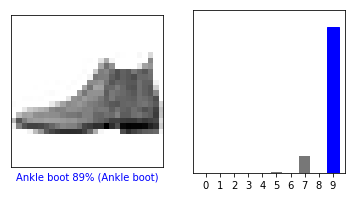

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

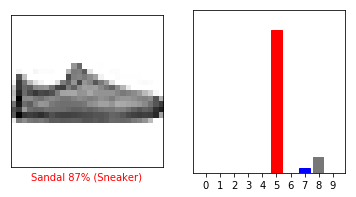

In [71]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

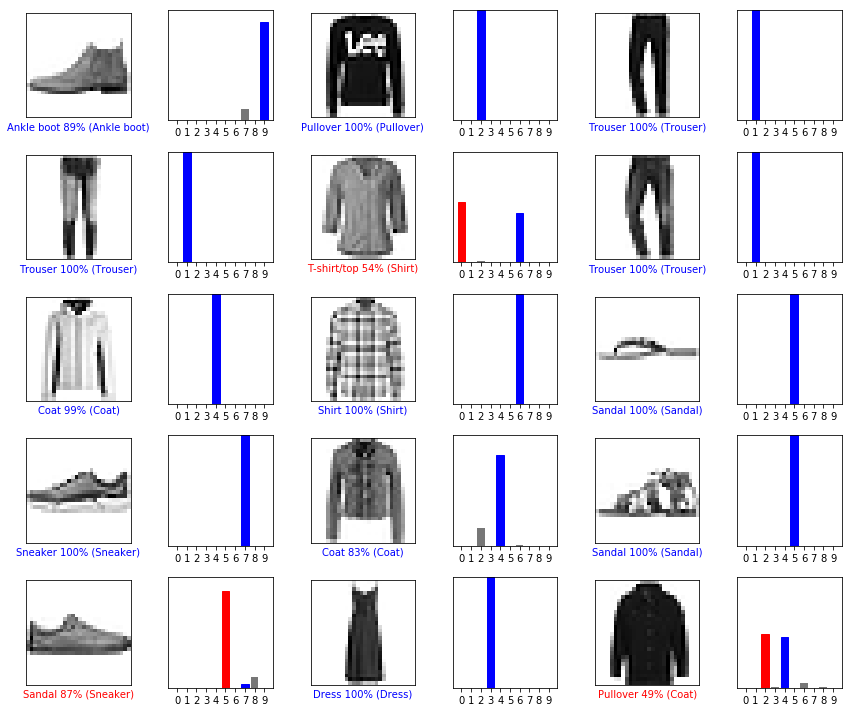

In [72]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
img = test_imgs[0]
img = np.expand_dims(img, 0)

In [80]:
sp = model.predict(img)
print(class_names[sp.argmax()])

Ankle boot


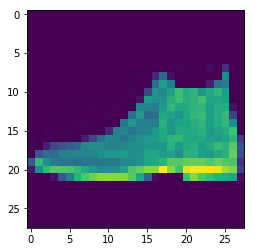

In [82]:
plt.imshow(img[0])